# Modelo de Clasificación de Días de Riesgo Meteorológico

## 1. Importación de librerias y carga de datos

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo de datos desde data/raw
df = pd.read_csv('../data/raw/data_cañete.txt', sep='\\s+', header=None)

# Asignar nombres de columnas
df.columns = ['anio', 'mes', 'dia', 'precipitacion', 'temp_max', 'temp_min']

## 2. Análisis Exploratorio de Datos (EDA)

### Ver estructura y tipos de datos

In [11]:
# Mostrar información básica del dataset
print("Información del dataset:")
print(f"Forma del dataset: {df.shape}")
print(f"Columnas: {list(df.columns)}")
print("\nPrimeras 5 filas:")
print(df.head())
print("\nTipos de datos por columna")
print(df.dtypes)

Información del dataset:
Forma del dataset: (27059, 6)
Columnas: ['anio', 'mes', 'dia', 'precipitacion', 'temp_max', 'temp_min']

Primeras 5 filas:
   anio  mes  dia  precipitacion  temp_max  temp_min
0  1936    7    1           0.45      17.2      12.6
1  1936    7    2           0.05      18.0      12.0
2  1936    7    3           0.00      19.0      12.9
3  1936    7    4           0.01      17.5      12.5
4  1936    7    5           0.00      17.0      13.0

Tipos de datos por columna
anio               int64
mes                int64
dia                int64
precipitacion    float64
temp_max         float64
temp_min         float64
dtype: object


### Verificar datos nulos

In [12]:
df.isnull().sum()

anio             0
mes              0
dia              0
precipitacion    0
temp_max         0
temp_min         0
dtype: int64

### Estadísticas descriptivas

In [13]:
df.describe()

,anio,mes,dia,precipitacion,temp_max,temp_min
count,27059.000000,27059.000000,27059.000000,27059.000000,27059.000000,27059.00000
mean,1973.038952,6.523560,15.729702,-45.262698,0.467872,-5.78718
std,21.390285,3.446806,8.800322,49.757543,48.568235,45.65369
min,1936.000000,1.000000,1.000000,-99.900000,-99.900000,-99.90000
25%,1955.000000,4.000000,8.000000,-99.900000,17.900000,12.50000
50%,1973.000000,7.000000,16.000000,0.000000,22.200000,15.00000
75%,1992.000000,10.000000,23.000000,0.000000,26.500000,17.90000
max,2010.000000,12.000000,31.000000,19.500000,35.500000,26.20000


### Visualización de distribuciones

#### Histograma

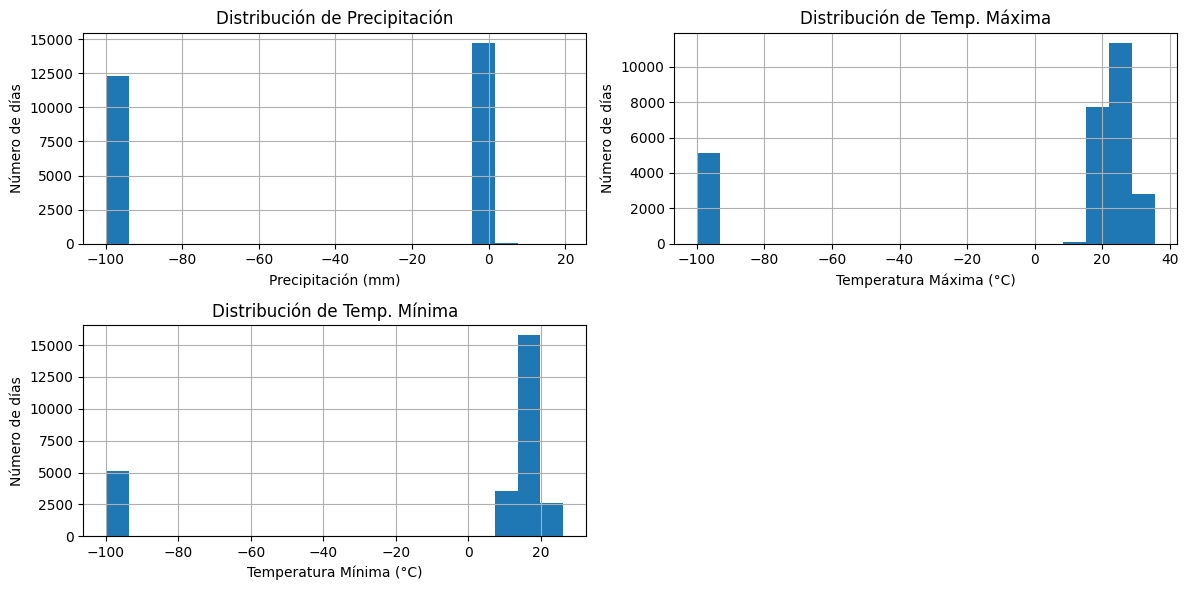

In [18]:
axes = df[['precipitacion', 'temp_max', 'temp_min']].hist(bins=20, figsize=(12,6))

# Personalizar cada gráfico
axes[0, 0].set_xlabel("Precipitación (mm)")
axes[0, 0].set_ylabel("Número de días")
axes[0, 0].set_title("Distribución de Precipitación")

axes[0, 1].set_xlabel("Temperatura Máxima (°C)")
axes[0, 1].set_ylabel("Número de días")
axes[0, 1].set_title("Distribución de Temp. Máxima")

axes[1, 0].set_xlabel("Temperatura Mínima (°C)")
axes[1, 0].set_ylabel("Número de días")
axes[1, 0].set_title("Distribución de Temp. Mínima")

plt.tight_layout()
plt.show()

#### Boxplots

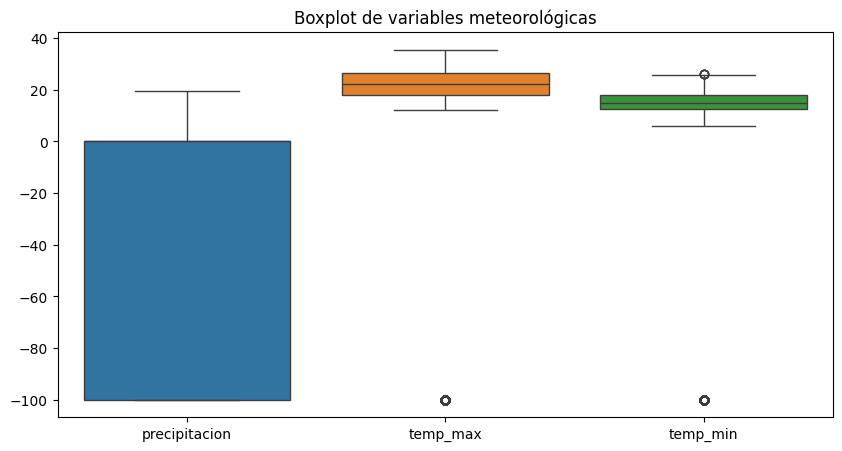

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['precipitacion', 'temp_max', 'temp_min']])
plt.title('Boxplot de variables meteorológicas')
plt.show()

### Matriz de Correlación

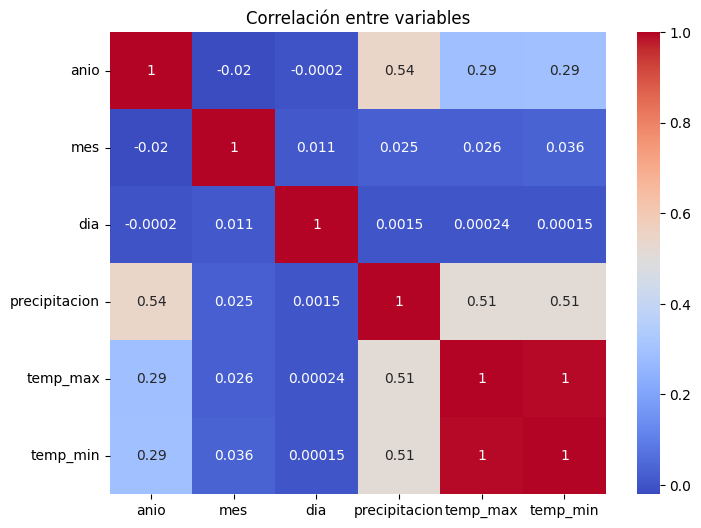

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()

### Variable de Clasificación

In [21]:
# Crear una nueva columna 'riesgo_meteorologico' basada en las condiciones especificadas
df['riesgo_meteorologico'] = np.where(
    (df['temp_max'] >= 33) | (df['precipitacion'] >= 15),
    1,  # Día de riesgo
    0   # Día normal
)

# Ver la cantidad de valores de riesgo meteorológico
print("\nConteo de días con riesgo meteorológico:")
print(df['riesgo_meteorologico'].value_counts())


Conteo de días con riesgo meteorológico:
riesgo_meteorologico
0    26950
1      109
Name: count, dtype: int64


## 3. Preprocesamiento de datos

### Reemplazar valores -99.9 por NaN

In [ ]:
# Reemplazar valores erróneos por NaN
df[['precipitacion', 'temp_max', 'temp_min']] = df[['precipitacion', 'temp_max', 'temp_min']].replace(-99.9, np.nan)

In [23]:
# Contar valores faltantes por columna
df.isnull().sum()

anio                        0
mes                         0
dia                         0
precipitacion           12267
temp_max                 5110
temp_min                 5141
riesgo_meteorologico        0
dtype: int64

In [25]:
# Imputar valores faltantes con la media de cada columna
df['temp_max'] = df['temp_max'].fillna(df['temp_max'].mean())
df['temp_min'] = df['temp_min'].fillna(df['temp_min'].mean())
df['precipitacion'] = df['precipitacion'].fillna(df['precipitacion'].mean())

In [26]:
# Volver a validar valores nulos
df.isnull().sum()

# Volver a mostrar la información del dataset después de las imputaciones
df.describe()

,anio,mes,dia,precipitacion,temp_max,temp_min,riesgo_meteorologico
count,27059.000000,27059.000000,27059.000000,27059.000000,27059.000000,27059.000000,27059.000000
mean,1973.038952,6.523560,15.729702,0.047996,23.834760,16.287554,0.004028
std,21.390285,3.446806,8.800322,0.259927,3.674495,2.582098,0.063342
min,1936.000000,1.000000,1.000000,0.000000,12.000000,5.800000,0.000000
25%,1955.000000,4.000000,8.000000,0.000000,21.400000,14.700000,0.000000
50%,1973.000000,7.000000,16.000000,0.047996,23.834760,16.287554,0.000000
75%,1992.000000,10.000000,23.000000,0.047996,26.500000,17.900000,0.000000
max,2010.000000,12.000000,31.000000,19.500000,35.500000,26.200000,1.000000


### Volver a generar la variable de clasificación

In [27]:
# Eliminar la columna si ya existe
if 'riesgo_meteorologico' in df.columns:
    df.drop(columns='riesgo_meteorologico', inplace=True)

# Crear de nuevo la columna ya con datos limpios
df['riesgo_meteorologico'] = np.where(
    (df['temp_max'] >= 33) | (df['precipitacion'] >= 15),
    1,
    0
)

# Ver la cantidad de valores de riesgo meteorológico
print("\nConteo de días con riesgo meteorológico:")
print(df['riesgo_meteorologico'].value_counts())


Conteo de días con riesgo meteorológico:
riesgo_meteorologico
0    26950
1      109
Name: count, dtype: int64


### Guardar los datos limpios

In [48]:
# Guardar los datos limpios en data/clean
df.to_csv('../data/clean/data_cañete_clean.csv', index=False)

## 4. Train/Test Split

### Separar variables predictoras y variable objetivo

In [28]:
# X = variables independientes (features)
X = df[['precipitacion', 'temp_max', 'temp_min']]

# y = variable objetivo
y = df['riesgo_meteorologico']

### Dividir en conjunto de entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y,
    random_state=42
)


### Verificar dimensiones

In [30]:
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)
print("Distribución en entrenamiento:", y_train.value_counts())
print("Distribución en prueba:", y_test.value_counts())


Tamaño del conjunto de entrenamiento: (21647, 3)
Tamaño del conjunto de prueba: (5412, 3)
Distribución en entrenamiento: riesgo_meteorologico
0    21560
1       87
Name: count, dtype: int64
Distribución en prueba: riesgo_meteorologico
0    5390
1      22
Name: count, dtype: int64


## 5. Entrenamiento del modelo

### Importar y entrenar el modelo

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo
modelo_arbol = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    class_weight='balanced',
    random_state=42
)

# Entrenarlo con el conjunto de entrenamiento
modelo_arbol.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


### Hacer predicciones

In [33]:
# Usamos el conjunto de prueba (X_test)
y_pred = modelo_arbol.predict(X_test)

### Evaluar el modelo

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Precisión general
print("Accuracy:", accuracy_score(y_test, y_pred))

# Reporte detallado
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5390
           1       1.00      1.00      1.00        22

    accuracy                           1.00      5412
   macro avg       1.00      1.00      1.00      5412
weighted avg       1.00      1.00      1.00      5412


Matriz de Confusión:
 [[5390    0]
 [   0   22]]


### Matriz de Confusión

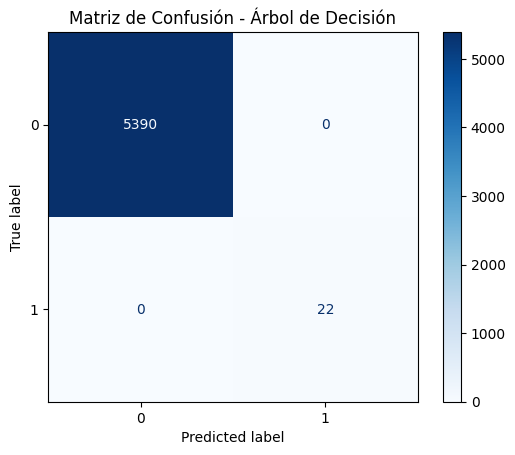

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrarla como imagen
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.grid(False)
plt.show()


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5390
           1       1.00      1.00      1.00        22

    accuracy                           1.00      5412
   macro avg       1.00      1.00      1.00      5412
weighted avg       1.00      1.00      1.00      5412



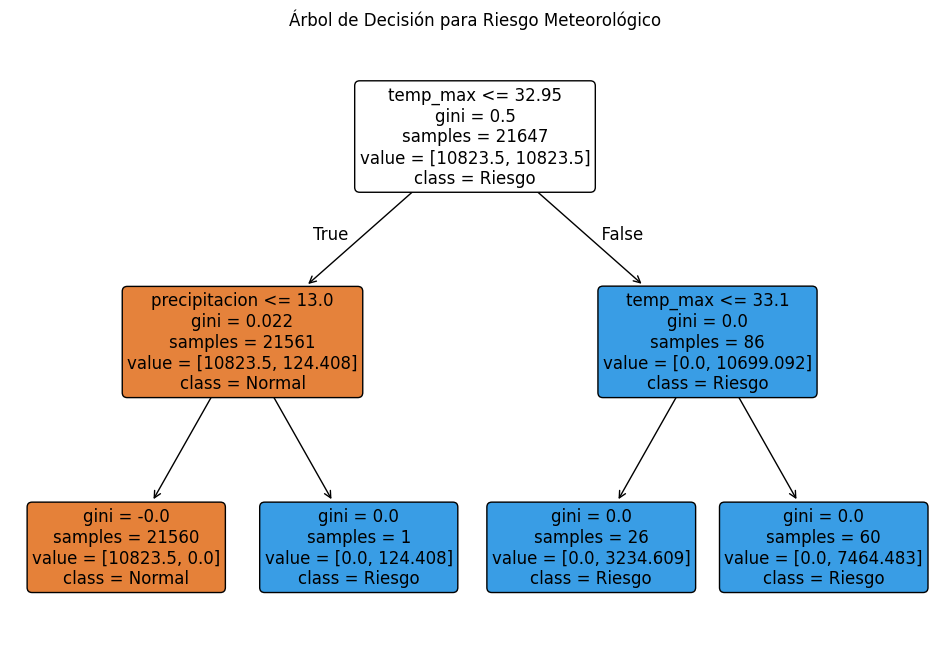

In [41]:
# Visualizar el árbol de decisión
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(modelo_arbol, 
          feature_names=X.columns,
          class_names=['Normal', 'Riesgo'],
          filled=True, 
          rounded=True,
          fontsize=12)
plt.title('Árbol de Decisión para Riesgo Meteorológico')
plt.show()

## Comparación con otros modelos

### Random Forest

#### Importar y crear el modelo

In [42]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

#### Entrenar el modelo

In [43]:
modelo_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Predecir con el conjunto de prueba

In [44]:
y_pred_rf = modelo_rf.predict(X_test)

#### Evaluar el modelo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5390
           1       1.00      0.95      0.98        22

    accuracy                           1.00      5412
   macro avg       1.00      0.98      0.99      5412
weighted avg       1.00      1.00      1.00      5412



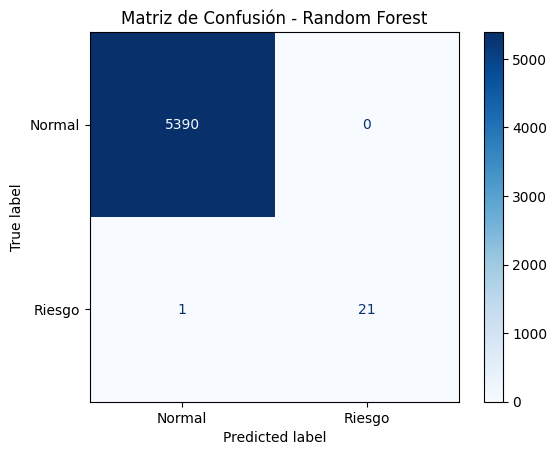

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Reporte de métricas
print(classification_report(y_test, y_pred_rf))

# Matriz de confusión
disp = ConfusionMatrixDisplay.from_estimator(
    modelo_rf, X_test, y_test, display_labels=['Normal', 'Riesgo'],
    cmap='Blues'
)
disp.ax_.set_title("Matriz de Confusión - Random Forest")
plt.show()

## Conclusiones

### Importancia de variables

In [46]:
# Obtener la importancia
importancias = modelo_rf.feature_importances_

# Asociarlas con sus nombres
features = X.columns
df_importancia = pd.DataFrame({'Variable': features, 'Importancia': importancias})
df_importancia = df_importancia.sort_values(by='Importancia', ascending=True)

### Graficar la importancia

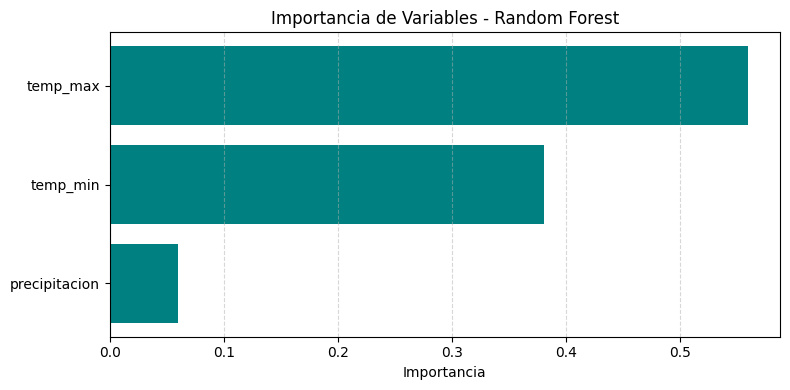

In [47]:
plt.figure(figsize=(8, 4))
plt.barh(df_importancia['Variable'], df_importancia['Importancia'], color='teal')
plt.title('Importancia de Variables - Random Forest')
plt.xlabel('Importancia')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Conclusión

- El modelo Random Forest mostró un desempeño excelente, con una precisión total del 100% y una capacidad de detección de días de riesgo meteorológico del 95%. Solo un caso fue clasificado erróneamente como día normal. Este resultado demuestra un equilibrio adecuado entre precisión y generalización, superior al árbol de decisión que había sobreajustado los datos.
- El análisis de importancia de variables reveló que la temperatura máxima es el factor más determinante para predecir el riesgo meteorológico, seguida por la temperatura mínima. La precipitación tuvo una influencia mínima en el modelo, lo cual concuerda con el comportamiento climático de la estación de Cañete, donde los eventos de lluvia intensa son escasos.

## Guardar el modelo

In [49]:
import joblib

# Guardar modelo entrenado
joblib.dump(modelo_rf, '../models/modelo_riesgo_meteorologico_rf.pkl')

['../models/modelo_riesgo_meteorologico_rf.pkl']

### Cargar el modelo y probar con nuevos datos

In [50]:
# Cargar modelo guardado
modelo_cargado = joblib.load('../models/modelo_riesgo_meteorologico_rf.pkl')

# Crear un nuevo día para predecir
nuevo_dia = pd.DataFrame([{
    'precipitacion': 2.0,
    'temp_max': 34.5,
    'temp_min': 25.0
}])

# Usar para predecir
prediccion = modelo_rf.predict(nuevo_dia)
print("Predicción:", prediccion[0])

Predicción: 1
